## Imports

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
from matplotlib import cm
from IPython.display import HTML
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.ticker import NullFormatter, MultipleLocator

## Set directory

In [2]:
os.chdir('../.')
os.getcwd()

# set data path
data_path = 'data/processed/'

## Default plotting style

In [4]:
# set default style
style = './src/visualisation/style.py'

palette12 = [
    '#011959', '#0f395f', '#165062', '#27635f',
    '#48714f', '#6d7c3b', '#97882c', '#c49138',
    '#eb9a60', '#fca995', '#fdbac7', '#faccfa'
]
palette9 = [
    '#011959', '#165062',
    '#48714f', '#6d7c3b', '#97882c', '#c49138',
    '#eb9a60', '#fca995',  '#faccfa'
]

palette9c = [
    '#e3342f', '#f6993f', '#ffed4a', '#38c172',
    '#4dc0b5', '#3490dc', '#6574cd', '#9561e2', 
    '#f66d9b'
]

palette3c= [
    '#e3342f', '#808080', '#808080', '#808080',
    '#808080', '#808080', '#808080', '#808080',
    '#f66d9b'
]

# set size for inline polots
mpl.rcParams['figure.dpi'] = 200

plt.style.use(style)
sns.color_palette(palette12)

[(0.00392156862745098, 0.09803921568627451, 0.34901960784313724),
 (0.058823529411764705, 0.2235294117647059, 0.37254901960784315),
 (0.08627450980392157, 0.3137254901960784, 0.3843137254901961),
 (0.15294117647058825, 0.38823529411764707, 0.37254901960784315),
 (0.2823529411764706, 0.44313725490196076, 0.30980392156862746),
 (0.42745098039215684, 0.48627450980392156, 0.23137254901960785),
 (0.592156862745098, 0.5333333333333333, 0.17254901960784313),
 (0.7686274509803922, 0.5686274509803921, 0.2196078431372549),
 (0.9215686274509803, 0.6039215686274509, 0.3764705882352941),
 (0.9882352941176471, 0.6627450980392157, 0.5843137254901961),
 (0.9921568627450981, 0.7294117647058823, 0.7803921568627451),
 (0.9803921568627451, 0.8, 0.9803921568627451)]

# Visualise processed files
  
## Templates

- https://barabasi.com/f/972.pdf
- https://www.nature.com/articles/s41586-022-05222-x
- https://www.nature.com/articles/s41586-022-05543-x
- https://github.com/rougier/scientific-visualization-book/blob/master/code/scales-projections/scales-log-log.py 
- https://twitter.com/DKThomp/status/1637093122306965504

## Transactions

In [5]:
transactions_data = pd.read_csv(Path(
    data_path+'201204-201703-service-transactions-processed.csv'
))

In [30]:
transactions_df = transactions_data.drop(columns=transactions_data.iloc[:, [0,1,2,3,5,6,7,8,9]].columns )

transactions_df = transactions_df.drop(columns=transactions_df.iloc[:, list(range(2,37,2))])

# to long format
volume_df = pd.melt(
    transactions_df, 
    id_vars='Servicetype', 
    value_vars=list(transactions_df.iloc[:, 1:].columns), 
    var_name='Time', 
    value_name='Volume', 
    ignore_index=False
)

volume_df[['Time', 'Volume']] = volume_df[['Time', 'Volume']].apply(pd.to_numeric)
volume_df = volume_df.astype({'Servicetype': 'category'})

volume_df = volume_df.groupby(['Servicetype','Time'])['Volume'].sum().unstack(level=1).reset_index()

# to long format
volume_df = pd.melt(
    volume_df, 
    id_vars='Servicetype', 
    value_vars=list(volume_df.iloc[:, 1:].columns), 
    var_name='Time', 
    value_name='Volume', 
    ignore_index=False
)

In [31]:
volume_df['Time'] =  pd.to_datetime(volume_df['Time'], format='%Y%m')

AttributeError: 'DataFrame' object has no attribute 'moving_avg'

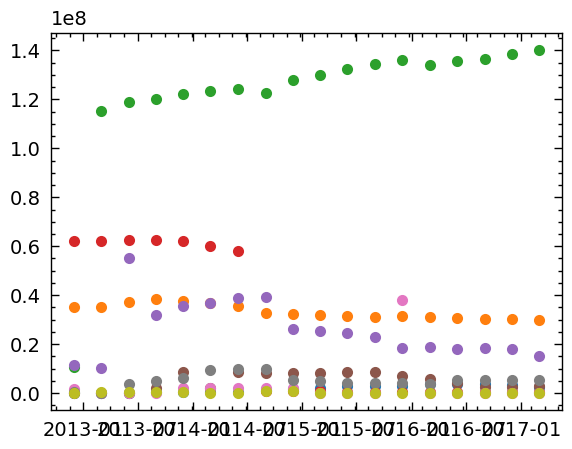

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[0]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[0]].reset_index().Volume,
        label=list(set(volume_df.Servicetype.unique()))[0])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[1]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[1]].reset_index().Volume,
        label=list(set(volume_df.Servicetype.unique()))[1])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[2]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[2]].reset_index().Volume, 
        label=list(set(volume_df.Servicetype.unique()))[2])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[3]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[3]].reset_index().Volume, 
        label=list(set(volume_df.Servicetype.unique()))[3])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[4]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[4]].reset_index().Volume, 
        label=list(set(volume_df.Servicetype.unique()))[4])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[5]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[5]].reset_index().Volume, 
        label=list(set(volume_df.Servicetype.unique()))[5])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[6]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[6]].reset_index().Volume,
        label=list(set(volume_df.Servicetype.unique()))[6])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[7]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[7]].reset_index().Volume,
        label=list(set(volume_df.Servicetype.unique()))[7])

ax1.scatter(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[8]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[8]].reset_index().Volume,
        label=list(set(volume_df.Servicetype.unique()))[8])



ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[0]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[0]].reset_index().moving_avg,
        label=list(set(volume_df.Servicetype.unique()))[0])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[1]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[1]].reset_index().moving_avg,
        label=list(set(volume_df.Servicetype.unique()))[1])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[2]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[2]].reset_index().moving_avg, 
        label=list(set(volume_df.Servicetype.unique()))[2])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[3]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[3]].reset_index().moving_avg, 
        label=list(set(volume_df.Servicetype.unique()))[3])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[4]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[4]].reset_index().moving_avg, 
        label=list(set(volume_df.Servicetype.unique()))[4])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[5]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[5]].reset_index().moving_avg, 
        label=list(set(volume_df.Servicetype.unique()))[5])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[6]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[6]].reset_index().moving_avg,
        label=list(set(volume_df.Servicetype.unique()))[6])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[7]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[7]].reset_index().moving_avg,
        label=list(set(volume_df.Servicetype.unique()))[7])

ax1.plot(volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[8]].reset_index().Time,
            volume_df.loc[volume_df['Servicetype'] == list(set(volume_df.Servicetype.unique()))[8]].reset_index().moving_avg,
        label=list(set(volume_df.Servicetype.unique()))[8])

# ax1.set_yscale('log')
ax1.set_xticklabels([2013, '', 2014, '', 2015, '', 2016, '', 2017])
ax1.set_xlabel('Time (Quarter)')

plt.legend(bbox_to_anchor=(1.1, 1.05));

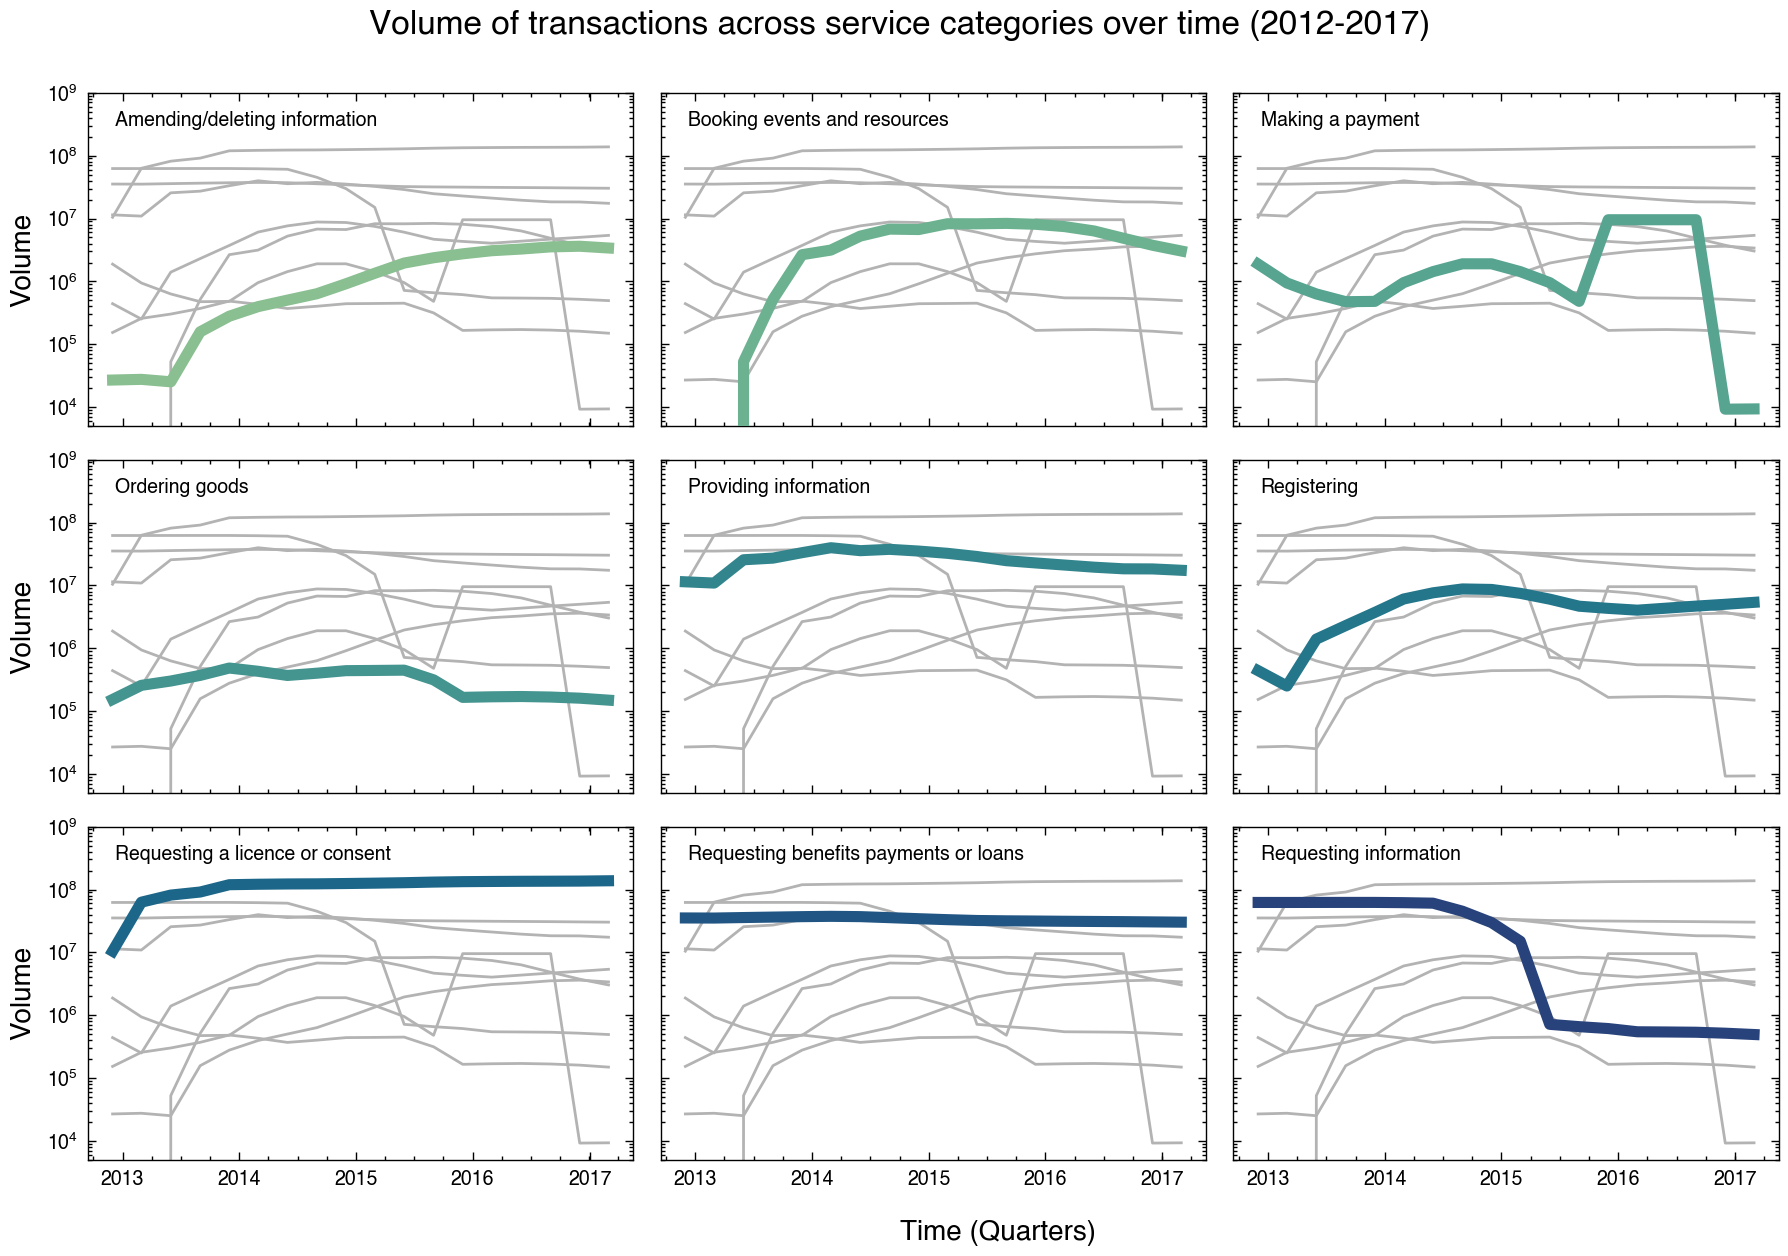

In [133]:
volume_df = volume_df.reset_index().drop(columns='index')

plt.rcParams["font.family"] = "Helvetica"


# Plot each year's time series in its own facet
g = sns.relplot(
    data=volume_df,
    x="Time", y="moving_avg", col="Servicetype", hue="Servicetype",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for service, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(0.05, .9, service, transform=ax.transAxes, fontweight="bold", fontsize='medium')

# Plot every year's time series in the background
    sns.lineplot(
        data=volume_df, x="Time", y="moving_avg", units="Servicetype",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Volume", size=10)
# g.set(xticklabels=[])

plt.yscale('log')

g.set_xticklabels([2013, 2014, 2015, 2016, 2017])

g.set(ylim=(5000, 1000000000))

g.despine(right=False, top=False)

g.fig.text(.5, 0, 'Time (Quarters)', size=10)

g.fig.suptitle('Volume of transactions across service categories over time (2012-2017)', y=1.025, size=12)

plt.subplots_adjust(hspace=0.1, wspace=0.05)

plt.savefig('src/visualisation/fig1-transaction-types-moving-avg.pdf')

In [211]:
volume_df['total_vol']= volume_df.groupby('Servicetype')['Volume'].transform('sum')

In [215]:
vol_tot_df = volume_df.loc[volume_df['Time'] == '2017-03-01'].drop(
    columns=['Time', 'Volume', 'moving_avg']).sort_values(
    'total_vol', ascending = False)

In [217]:
vol_tot_df['cum_sum'] = vol_tot_df['total_vol'].cumsum()
vol_tot_df['cum_perc'] = 100*vol_tot_df['cum_sum']/vol_tot_df['total_vol'].sum()

In [222]:
3.970790e+09

3970790000.0

https://twitter.com/DKThomp/status/1637093122306965504

# TRY THE ONE ABOVE

## Domains and Websites

In [5]:
websites_data = pd.read_csv(Path(data_path+'201202-201809-central-government-websites.csv'))

In [6]:
websites_df = websites_data[~websites_data['URL'].str.contains(".gov.uk").fillna(False)]

In [7]:
websites_df = websites_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0']).groupby(['Year']).count()

In [8]:
websites_df = websites_df.reset_index()

In [12]:
domains_data = pd.read_csv(Path(data_path+'201210-202303-govuk-domain-names.csv'))

domains_df = domains_data.groupby(['Year']).count()

domains_df = domains_df.reset_index()

### Redo this plot to make the difference more interesting

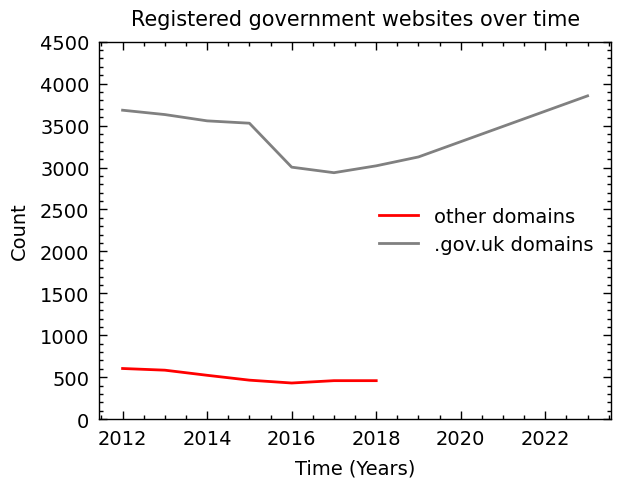

In [13]:
sns.lineplot(data=websites_df, x="Year", y="URL", color='red')

sns.lineplot(data=domains_df, x="Year", y="Domain_name", color='gray')

plt.title('Registered government websites over time', fontsize=7.5);
plt.ylabel('Count')
plt.xlabel('Time (Years)')
plt.ylim([0, 4500])

plt.legend(['other domains', '.gov.uk domains'])

# plt.savefig('src/visualisation/websites.png')

### investigate the data above!

## Unique visitors

#### 2012

In [135]:
visits2012_data = pd.read_csv(Path(data_path+'201104-201203-govuk-unique-visitors-processed.csv'))

visits2012_data.columns = [i.replace('_', '') for i in visits2012_data.columns]

visits12_df = visits2012_data.dropna(how='any')

visits12_df['visits'] = visits12_df.sum(axis=1, numeric_only=True)

visits12_df = visits12_df.loc[:, ['URL', 'visits']].sort_values('visits', ascending=False)

visits12_df.iloc[0, 1] = visits12_df.iloc[0, 1] + visits12_df.iloc[1, 1]

visits12_df.drop(3, inplace=True)

visits12_df = visits12_df.reset_index().drop(columns='index')

/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_60107/2868818079.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits12_df['visits'] = visits12_df.sum(axis=1, numeric_only=True)


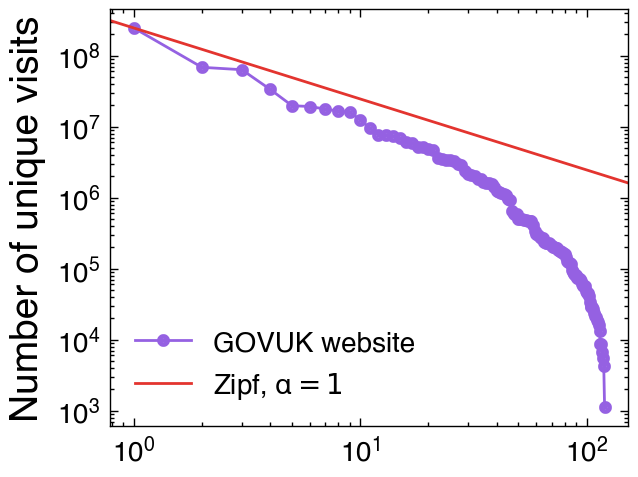

In [142]:
n = len(visits12_df)

ranks = range(1, n+1)
visits12_df['rank'] = ranks
freqs = list(visits12_df.visits)

xs = ranks[0], ranks[-1]
ys = freqs[0], freqs[-1]

figure = plt.figure()

plt.rcParams["font.family"] = "Helvetica"

ax = plt.subplot()
line1, = ax.plot(ranks, freqs, 
         linestyle="-", color='#9561e2', fillstyle='full',
         marker="o", markersize=1.6, 
         markeredgewidth=3,
         label='GOVUK website')
line2 = ax.axline((1, ys[0]), slope=-1, color='#e3342f', label='Zipf, \u03B1$=1$')

ax.set_xlabel('')
ax.set_ylabel('Number of unique visits', fontsize=14)
# ax.set_title("Visits to GOVUK websites (2012)", size=14)
ax.set_xscale('log')
ax.set_yscale('log')

# ax.grid(False, "minor", color="0.85", linewidth=0.50, zorder=-20)
# ax.grid(False, "major", color="0.65", linewidth=0.75, zorder=-10)

ax.tick_params(axis="y", direction="in", which='both')
ax.tick_params(axis="x", direction="in", which='both')

plt.legend(
    handles=[line1, line2], frameon=False, fancybox=False, loc='lower left',
    facecolor='white', framealpha=1, edgecolor='black', fontsize=10,
)

ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.savefig("./src/visualisation/fig1-govuk-websites-log-log.pdf")

#### 2022

In [167]:
visits2022_data = pd.read_excel(Path(data_path+'202110-202209-govuk-unique-visitors.xlsx')) 

visits_data = visits2022_data[['Page', 'Unique clicks']]

visits_data = visits_data.dropna(subset=['Unique clicks'], how='any')

visits_data.rename(columns={'Unique clicks': 'visits','Page': 'page'},
                   inplace=True)

visits22_df = visits_data.sort_values('visits', ascending=False)

n = len(visits22_df)

ranks = range(1, n+1)
visits22_df['rank'] = ranks
freqs = list(visits22_df.visits)

xs = ranks[0], ranks[-1]
ys = freqs[0], freqs[-1]

In [223]:
visits22_df

,page,visits,rank
0,/report-covid19-result,96845562,1
1,/sign-in-universal-credit,89314937,2
2,/check-mot-history,43227373,3
3,/get-information-about-a-company,31152780,4
4,/vehicle-tax,28768159,5
...,...,...,...
43074,/maib-reports/structural-failure-of-container-...,100,43211
43075,/government/publications/space-related-educati...,100,43212
43076,/apply-for-disabled-bus-pass/bridgend,100,43213
43077,/apply-for-disabled-bus-pass/denbighshire,100,43214


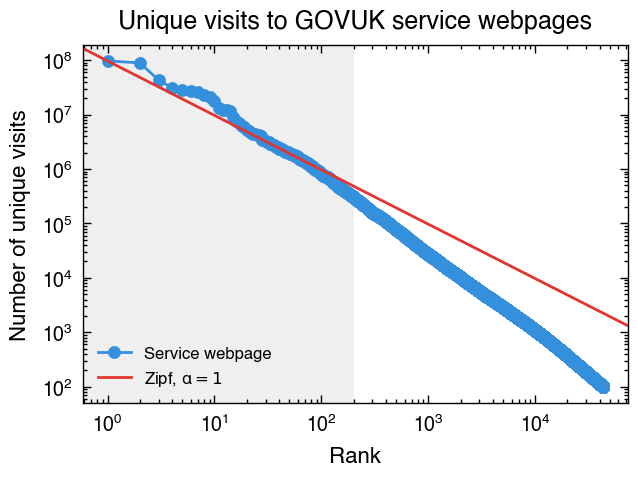

In [150]:
figure = plt.figure()

plt.rcParams["font.family"] = "Helvetica"

ax = plt.subplot()
line1, = ax.plot(ranks, freqs, 
         linestyle="-", color='#3490dc', fillstyle='full',
         marker="o", markersize=1.6, 
         markeredgewidth=3,
         label='Service webpage')
line2 = ax.axline((1, 96845562), slope=-1, color='#e3342f', label='Zipf, \u03B1$=1$')

ax.set_xlabel('Rank', fontsize=8)
ax.set_ylabel('Number of unique visits', fontsize=8)
ax.set_title("Unique visits to GOVUK service webpages", size=9)
ax.set_xscale('log')
ax.set_yscale('log')

# ax.grid(False, "minor", color="0.85", linewidth=0.50, zorder=-20)
# ax.grid(False, "major", color="0.65", linewidth=0.75, zorder=-10)

ax.tick_params(axis="y", direction="in", which='both')
ax.tick_params(axis="x", direction="in", which='both')

plt.legend(
    handles=[line1, line2], frameon=False, fancybox=False, loc='lower left',
    facecolor='white', framealpha=1, edgecolor='black', fontsize=6,
)

plt.axvspan(0, 200, facecolor='#EFEFEF')

plt.tight_layout()
plt.savefig("./src/visualisation/fig1-govuk-visits-log-log.pdf")

##### Cumulative count

- Another thing to plot is cumulative count, i.e. for rank 1 plot just the original frequency, for rank2, the sum of ranks 1 and 2, and so on. This plot allows us to see how rapidly the occurrences accounted for by the top N ranks approach the total occurrences in the data

In [151]:
visits22_df['cum_sum'] = visits22_df['visits'].cumsum()
visits22_df['cum_perc'] = 100*visits22_df['cum_sum']/visits22_df['visits'].sum()

cum_perc = list(visits22_df.cum_perc)
cum_sum = list(visits22_df.cum_perc)

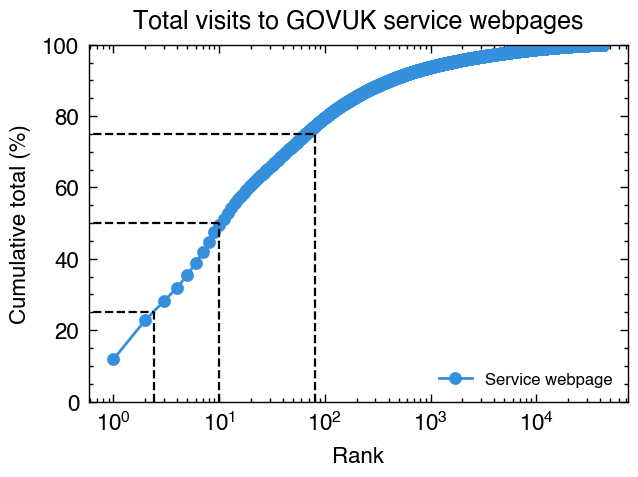

In [152]:
figure = plt.figure()

plt.rcParams["font.family"] = "Helvetica"

ax = plt.subplot()
line1, = ax.plot(ranks, cum_perc, 
         linestyle="-", color='#3490dc', fillstyle='full',
         marker="o", markersize=1.6, 
         markeredgewidth=3,
        label='Service webpage'
        )

ax.set_xscale('log')
ax.set_ylim(0,100)

ax.hlines(y=25, xmin=0, xmax=2.4, linewidth=.8, color='black', linestyle='--')
ax.vlines(x=2.4, ymin=0, ymax=25, linewidth=.8, color='black', linestyle='--')

ax.hlines(y=50, xmin=0, xmax=10, linewidth=.8, color='black', linestyle='--')
ax.vlines(x=10, ymin=0, ymax=50, linewidth=.8, color='black', linestyle='--')

ax.hlines(y=75, xmin=0, xmax=80, linewidth=.8, color='black', linestyle='--')
ax.vlines(x=80, ymin=0, ymax=75, linewidth=.8, color='black', linestyle='--')

ax.set_title("Total visits to GOVUK service webpages", size=9)
ax.set_ylabel('Cumulative total (%)', fontsize=8)
ax.set_xlabel('Rank', fontsize=8)
ax.tick_params(axis='both', labelsize=8)

plt.legend(
    handles=[line1], frameon=False, fancybox=False, loc='lower right',
    facecolor='white', framealpha=1, edgecolor='black', fontsize=6,
)


plt.tight_layout()
plt.savefig("./src/visualisation/fig1-govuk-visits-cum_per.pdf")

- Get statistics similar to table in this [article](https://www.arteuna.com/talleres/lab/ediciones/libreria/Glottometrics-zipf.pdf#page=148)

In [320]:
print('Top 5 service pages:\n\n', visits_data.iloc[:6, :]) 

Top 5 service pages:

                                page    clicks  rank
0            /report-covid19-result  96845562     1
1         /sign-in-universal-credit  89314937     2
2                /check-mot-history  43227373     3
3  /get-information-about-a-company  31152780     4
4                      /vehicle-tax  28768159     5
5             /get-coronavirus-test  27325433     6


## Forms data

- 202211-form-services-pageviews.xlsx

In [4]:
formservices2021_data = pd.read_excel(Path(data_path+'202211-form-services-pageviews.xlsx')) 

form_df = formservices2021_data.iloc[1:]

form_df.rename(columns={'Unnamed: 2':'views',form_df.columns.unique()[0]: 'form'}, inplace=True)

form_df['views'] = form_df['views'].astype(int)

n = len(form_df)

/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_23132/2559502083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  form_df.rename(columns={'Unnamed: 2':'views',form_df.columns.unique()[0]: 'form'}, inplace=True)
/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_23132/2559502083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  form_df['views'] = form_df['views'].astype(int)


In [5]:
ranks2 = range(1, n+1)
form_df['rank'] = ranks2
freqs2 = list(form_df.views)

xs2 = ranks2[0], ranks2[-1]
ys2 = freqs2[0], freqs2[-1]

/var/folders/5f/f4nt1g8x77ggbhbbvwpth89c0000gr/T/ipykernel_23132/178247183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  form_df['rank'] = ranks2


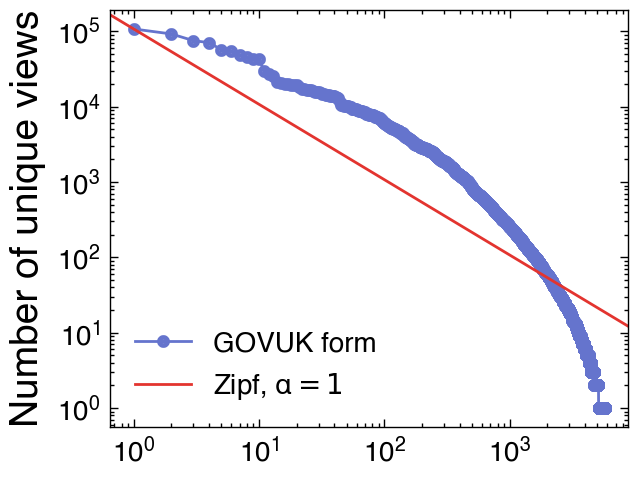

In [155]:
figure = plt.figure()

plt.rcParams["font.family"] = "Helvetica"

ax = plt.subplot()
line1, = ax.plot(ranks2, freqs2, 
         linestyle="-", color='#6574cd', fillstyle='full',
         marker="o", markersize=1.6, 
         markeredgewidth=3,
         label='GOVUK form')
line2 = ax.axline((1, ys2[0]), slope=-1, color='#e3342f', label='Zipf, \u03B1$=1$')

# ax.set_xlabel('Rank', fontsize=8)
ax.set_ylabel('Number of unique views', fontsize=14)
# ax.set_title("Unique clicks to service pages (2022)", size=8,  **hfont)
ax.set_xscale('log')
ax.set_yscale('log')

# ax.grid(False, "minor", color="0.85", linewidth=0.50, zorder=-20)
# ax.grid(False, "major", color="0.65", linewidth=0.75, zorder=-10)

ax.tick_params(axis="y", direction="in", which='both')
ax.tick_params(axis="x", direction="in", which='both')

plt.legend(
    handles=[line1, line2], frameon=False, fancybox=False, loc='lower left',
    facecolor='white', framealpha=1, edgecolor='black', fontsize=10,
)

ax.tick_params(axis='both', labelsize=10)

# plt.axvspan(0, 200, facecolor='#EFEFEF')

plt.tight_layout()
plt.savefig("./src/visualisation/fig1-govuk-views-log-log.pdf");

202212-govuk-departments-with-forms.xlsx

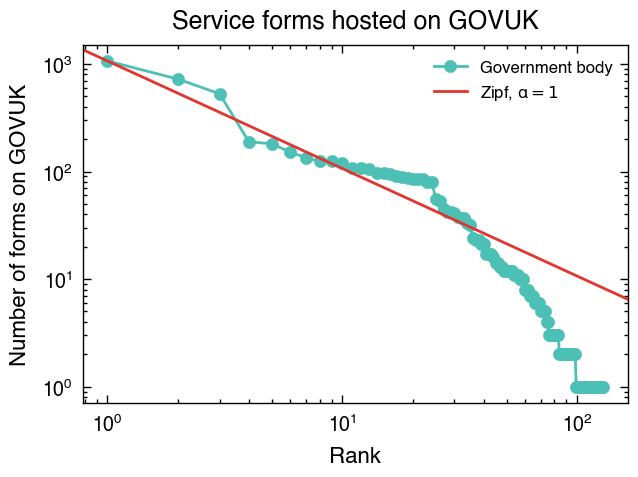

In [6]:
formnumber_df = pd.read_excel(Path(data_path+'202212-govuk-departments-with-forms-processed.xlsx')) 

n = len(formnumber_df)

ranks3 = range(1, n+1)
formnumber_df['rank'] = ranks3
freqs3 = list(formnumber_df.total)

xs3 = ranks3[0], ranks3[-1]
ys3 = freqs3[0], freqs3[-1]

figure = plt.figure()

plt.rcParams["font.family"] = "Helvetica"

ax = plt.subplot()
line1, = ax.plot(ranks3, freqs3, 
         linestyle="-", color='#4dc0b5', fillstyle='full',
         marker="o", markersize=1.6, 
         markeredgewidth=3,
         label='Government body')
line2 = ax.axline((1, ys3[0]), slope=-1, color='#e3342f', label='Zipf, \u03B1$=1$')

ax.set_xlabel('Rank', fontsize=8)
ax.set_ylabel('Number of forms on GOVUK', fontsize=8)
ax.set_title("Service forms hosted on GOVUK", size=9)
ax.set_xscale('log')
ax.set_yscale('log')

# ax.grid(False, "minor", color="0.85", linewidth=0.50, zorder=-20)
# ax.grid(False, "major", color="0.65", linewidth=0.75, zorder=-10)

ax.tick_params(axis="y", direction="in", which='both')
ax.tick_params(axis="x", direction="in", which='both')

plt.legend(
    handles=[line1, line2], frameon=False, fancybox=False, loc='upper right',
    facecolor='white', framealpha=1, edgecolor='black', fontsize=6,
)

# plt.axvspan(0, 200, facecolor='#EFEFEF')

plt.tight_layout()
plt.savefig("./src/visualisation/fig1-govuk-hosted-forms-log-log.pdf");

In [8]:
formnumber_df.head(10)

,organisation,organisation_type,total,rank
0,HM Courts & Tribunals Service,executive_agency,1066,1
1,HM Revenue & Customs,non_ministerial_department,722,2
2,Companies House,executive_agency,529,3
3,Ministry of Justice,ministerial_department,189,4
4,"Department for Environment, Food & Rural Affairs",ministerial_department,181,5
5,Animal and Plant Health Agency,executive_agency,152,6
6,HM Land Registry,non_ministerial_department,134,7
7,Home Office,ministerial_department,125,8
8,Criminal Procedure Rule Committee,advisory_ndpb,124,9
9,Environment Agency,executive_ndpb,121,10


## Verbs, topics, organisations and (service) transaction types?

- 201212-xgov-govuk-services-list.xlsx

In [4]:
services2022 = pd.read_excel(Path(data_path+'202212-xgov-govuk-services-list.xlsx')) 

verbs = services2022['verb'].value_counts()

verbs_df = pd.DataFrame({'verb':verbs.index, 'freq':verbs.values})

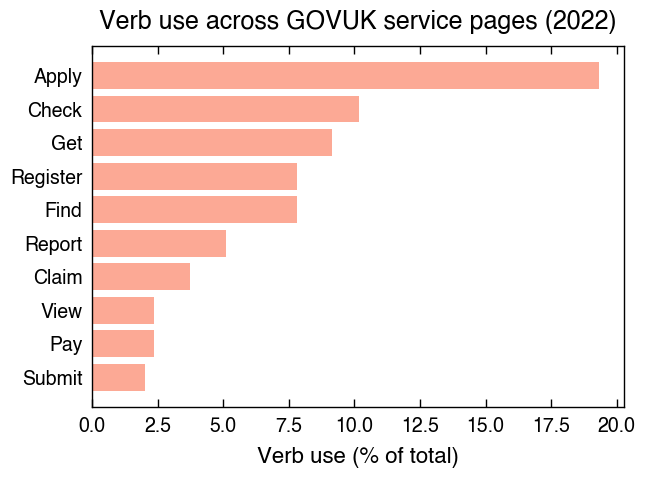

In [163]:
# exclude non verbs and put the preprocessing code in a script !!!

verbs = [
    'Apply', 'Check', 'Get', 'Register', 'Find', 'Report', 'Claim',
    'View', 'Pay', 'Submit', 'Manage', 'Book', 'Make', 'Create', 
    'Appeal', 'Search', 'File', 'Use', 'Send', 'Sign', 'Ask', 'Explore',
    'Publish', 'Change', 'Prove', 'Plan', 'Look', 'Order', 'Tell', 'Help',
    'Fill', 'Support', 'Refer', 'Declare', 'Request', 'Complain', 'Accept',
    'Verify', 'Update', 'Cancel', 'Remove', 'Recruit', 'Calculate', 'Track', 
    'Renew', 'Give', 'Record', 'Respond', 'Comply', 'Complete', 'Analyse', 
    'Replace', 'Download', 'Repay', 'Add', 'Visit', 'Reply', 'Evict', 'Offer'
]         

verbs_df = verbs_df[~verbs_df["verb"].isin(verbs) == False]

# get percentage
verbs_df['perc'] = (verbs_df['freq'] / verbs_df['freq'].sum()) * 100
 
# creating the bar plot
plt.rcParams["font.family"] = "Helvetica"


fig = plt.figure()
plt.barh(verbs_df.iloc[:10, :].verb, verbs_df.iloc[:10, :].perc, color='#fca995')
plt.gca().invert_yaxis()
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False) 

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    bottom=False,         # ticks along the top edge are off
    labelright=False)

plt.title('Verb use across GOVUK service pages (2022)', fontsize=9)
plt.xlabel('Verb use (% of total)', fontsize=8)
plt.ylabel('', fontsize=8)

plt.tight_layout()
plt.savefig("./src/visualisation/fig1-verb-use.pdf");

In [174]:
topics = services2022['topic'].value_counts()

topics_df = pd.DataFrame({'topic': topics.index, 'freq': topics.values})

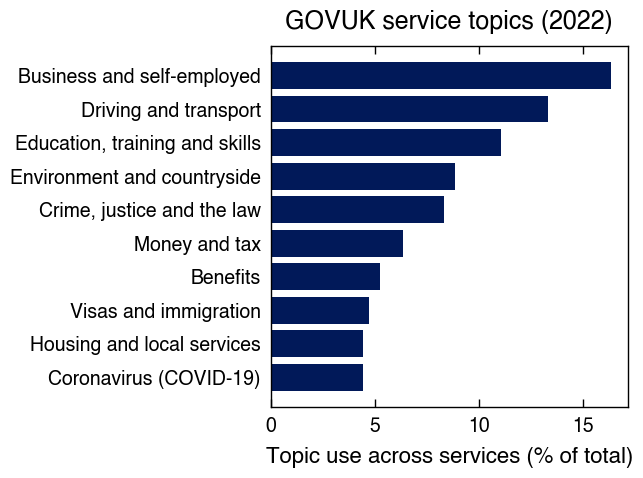

In [196]:
# get percentage
topics_df['perc'] = (topics_df['freq'] / topics_df['freq'].sum()) * 100
 
# creating the bar plot
plt.rcParams["font.family"] = "Helvetica"


fig = plt.figure()
plt.barh(topics_df.iloc[:10, :].topic, topics_df.iloc[:10, :].perc, color='#011959')
plt.gca().invert_yaxis()
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False) 

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    bottom=False,         # ticks along the top edge are off
    labelright=False)

plt.title('GOVUK service topics (2022)', fontsize=9)
plt.xlabel('Topic use across services (% of total)', fontsize=8)
plt.ylabel('', fontsize=8)

plt.tight_layout()
plt.savefig("./src/visualisation/fig1-topics.pdf");

In [5]:
orgs = services2022['organisation'].value_counts()

orgs_df = pd.DataFrame({'org': orgs.index, 'freq': orgs.values})

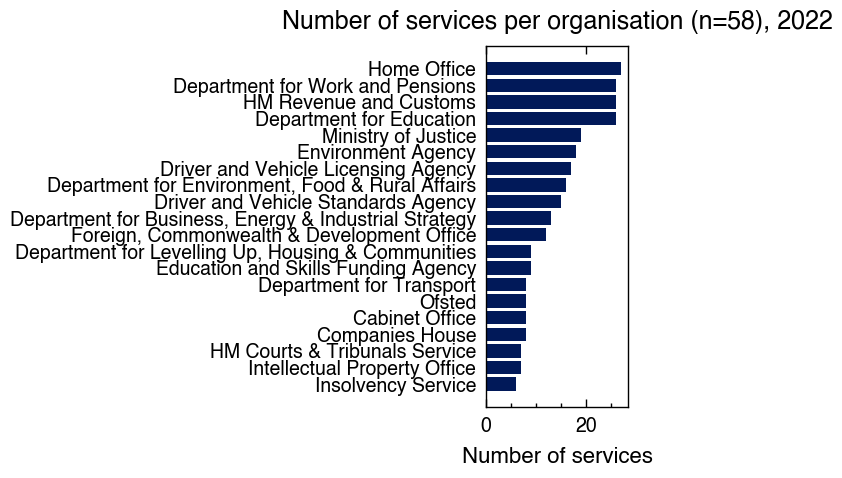

In [27]:

# creating the bar plot
plt.rcParams["font.family"] = "Helvetica"


fig = plt.figure()
plt.barh(orgs_df.iloc[:20, :].org, orgs_df.iloc[:20, :].freq, color='#011959')
plt.gca().invert_yaxis()
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False) 

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    top=False,         # ticks along the top edge are off
    bottom=True,         # ticks along the top edge are off
    labelright=False)

plt.title('Number of services per organisation (n=58), 2022', fontsize=9)
plt.xlabel('Number of services', fontsize=8)
plt.ylabel('', fontsize=8)

plt.tight_layout()
# plt.savefig("./src/visualisation/fig1-topics.pdf");